# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

659

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city.replace(" ", "+")

    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    except:
        print("City not found. Skipping...")
        pass
              
print("---------- Done -----------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | semey
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | sukhumi
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | teguise
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | shahr-e babak
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | abu dhabi
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | kamina
Processing Record 19 of Set 1 | tsumeb
Processing Record 20 of Set 1 | oyem
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | puerto ayora
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame(city_data)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,semey,50.4111,80.2275,-22.88,84,42,2.00,KZ,1674090295
1,atuona,-9.8000,-139.0333,25.80,78,39,8.55,PF,1674090271
2,nanortalik,60.1432,-45.2371,-1.98,82,100,6.54,GL,1674090532
3,ushuaia,-54.8000,-68.3000,11.82,90,4,1.76,AR,1674090450
4,sukhumi,43.0033,41.0153,10.08,52,15,2.37,GE,1674090533


In [5]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,6.020000e+02
mean,20.091784,18.270333,9.077342,75.428571,60.664452,3.505764,1.674091e+09
std,32.910789,90.856343,18.301125,18.839785,41.749116,2.603723,9.486496e+01
min,-54.800000,-175.200000,-56.640000,11.000000,0.000000,0.000000,1.674090e+09
25%,-8.386275,-64.172100,0.485000,67.000000,13.000000,1.540000,1.674091e+09
50%,25.945150,20.215950,15.105000,78.000000,77.500000,2.930000,1.674091e+09
75%,45.551450,97.183775,23.277500,89.000000,100.000000,4.630000,1.674091e+09
max,78.218600,179.316700,35.230000,100.000000,100.000000,19.730000,1.674091e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_index = df[(df["Humidity"] > 100)].index
type(humidity_index)

pandas.core.indexes.numeric.Int64Index

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = df.drop(humidity_index, inplace=False)
clean_city_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,semey,50.4111,80.2275,-22.88,84,42,2.00,KZ,1674090295
1,atuona,-9.8000,-139.0333,25.80,78,39,8.55,PF,1674090271
2,nanortalik,60.1432,-45.2371,-1.98,82,100,6.54,GL,1674090532
3,ushuaia,-54.8000,-68.3000,11.82,90,4,1.76,AR,1674090450
4,sukhumi,43.0033,41.0153,10.08,52,15,2.37,GE,1674090533


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

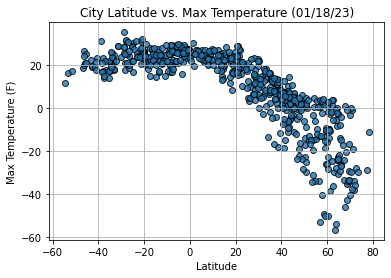

In [9]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Instructions/output_data/Fig1.png")

plt.show()


## Latitude vs. Humidity Plot

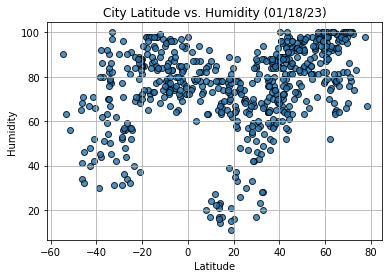

In [10]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Instructions/output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

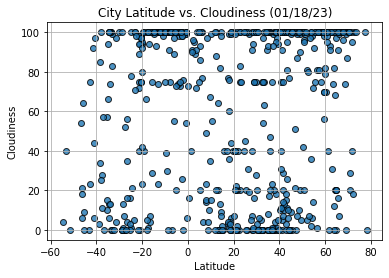

In [11]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Instructions/output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

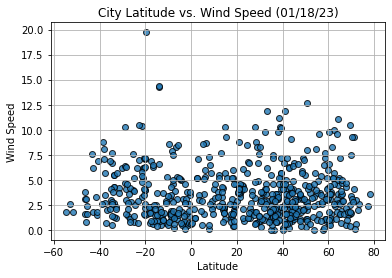

In [12]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Instructions/output_data/Fig4.png")

plt.show()

## Linear Regression

In [13]:
def linear_plot(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [14]:
northern_hemi_df = clean_city_df.loc[(clean_city_df["Lat"] >= 0)]
southern_hemi_df = clean_city_df.loc[(clean_city_df["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6900984503873767


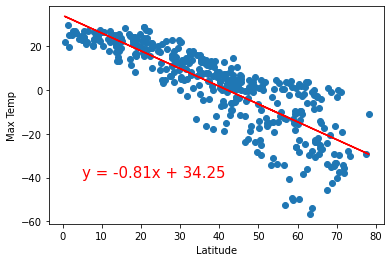

In [15]:
linear_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp',(5,-40))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.09755967840104247


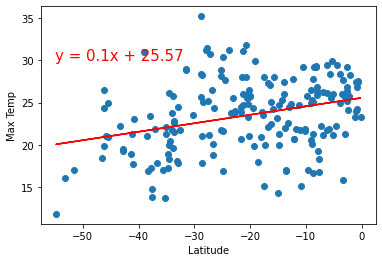

In [16]:
linear_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Max Temp',(-55,30))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24203362969316217


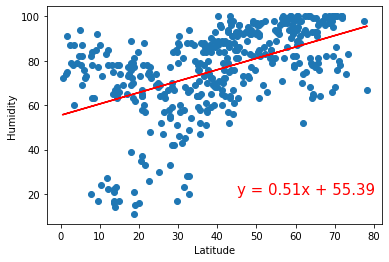

In [17]:
linear_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Humidity',(45,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21970307880366086


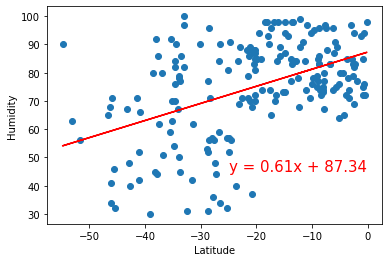

In [18]:
linear_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Humidity',(-25,45))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08114482837550648


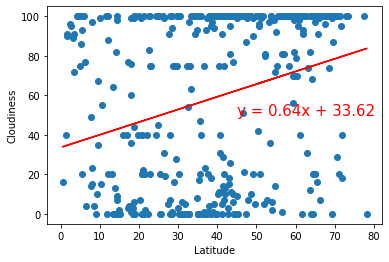

In [19]:
linear_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness',(45,50))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2037743307167012


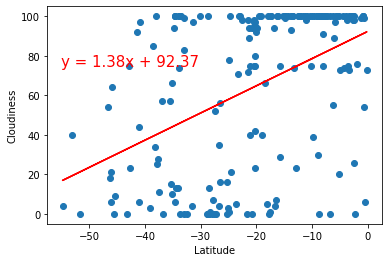

In [20]:
linear_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Cloudiness',(-55,75))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 1.803828131424031e-05


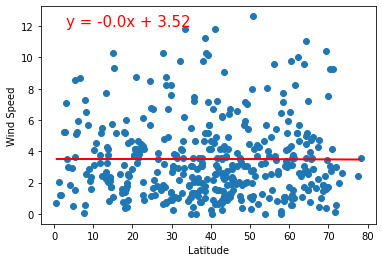

In [21]:
linear_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Wind Speed',(3,12))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.014984848931529356


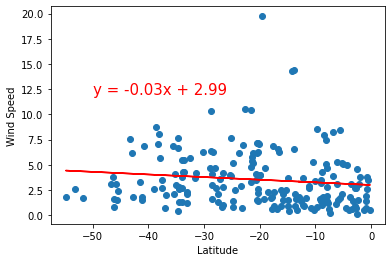

In [22]:
linear_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Wind Speed',(-50,12))